## <font color='blue'>**Project**</font>


This project has 3 parts. The first one consists in using descriptive analysis and clustering techniques to represent the problem in the best way possible. Then, I apply different techniques for features selection and dimensionality reduction to obtain the best outcome possible in the problem of binary classification.
The dataset is available here: https://archive.ics.uci.edu/ml/datasets/HTRU2 


## 1. Descriptive Analysis and Clustering



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from matplotlib import style, offsetbox
import matplotlib.cm as cm
style.use('ggplot') or plt.style.use('ggplot')
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram

import sklearn.feature_selection as featsel
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors, metrics)
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_selection import (f_classif, VarianceThreshold, chi2, mutual_info_classif, SelectKBest,
                                       SelectPercentile)
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

from ipywidgets import interact, widgets


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/Users/sbk/Documents/GitHub/Diplomado/Archivos/HTRU_2.csv'
data= pd.read_csv(path, names=['Mean of the integrated profile' , 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 
                                   'Skewness of the integrated profile','Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve',
                                   'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve','Class'])

y_data = data["Class"]
X_data = data.drop("Class", axis=1)
real_names = list(X_data.columns);

#for simplicity, I will use an alternative name for the cols:
features_names = [];
for ix in range(len(real_names)):
    features_names.append('Feat' + str(ix))

#update Dataframe with the new names:
X_data.columns = features_names;

In [3]:
#Display first 5 rows:
X_data.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [4]:
#Deploy description of the data without the target:
X_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Feat0,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
Feat1,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
Feat2,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Feat3,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Feat4,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392141
Feat5,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
Feat6,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Feat7,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309330,1191.000837


In [5]:
#Check for missing values in the dataframe:

nanVals = X_data.isna().sum()
if sum(nanVals[:]) == 0:
    print('No missing values found in the Dataset');
else:
    print('Dataset with missing values - clean up');


No missing values found in the Dataset


<font color = red> The dataset contains information of different variables that describe pulsars. Due to the wide range of the values in which each feature fluctuates, we will use the method StandardScaler to standardize and normalize the data. </font>

In [7]:
#Transform/normalize the data:
from sklearn.preprocessing import StandardScaler
dummy = X_data.copy();
normX = StandardScaler().fit_transform(dummy);

normX = pd.DataFrame(normX, columns = features_names);
#normX = stats.zscore(norm, axis=1, nan_policy='omit')


In [8]:
#generate a copy of the dataframe for some plots with seaborn:
normX2 = normX.copy();
normX2['Class'] = y_data;


<font color = red> Now we evaluate how each feature describes the difference between the two classes of pulsar: </font>

For the feature 0, significant differences between the pulsar classes were found with a p-value = 0.0
For the feature 1, significant differences between the pulsar classes were found with a p-value = 0.0
For the feature 2, significant differences between the pulsar classes were found with a p-value = 0.0
For the feature 3, significant differences between the pulsar classes were found with a p-value = 0.0
For the feature 4, significant differences between the pulsar classes were found with a p-value = 0.0
For the feature 5, significant differences between the pulsar classes were found with a p-value = 0.0
For the feature 6, significant differences between the pulsar classes were found with a p-value = 0.0
For the feature 7, significant differences between the pulsar classes were found with a p-value = 0.0


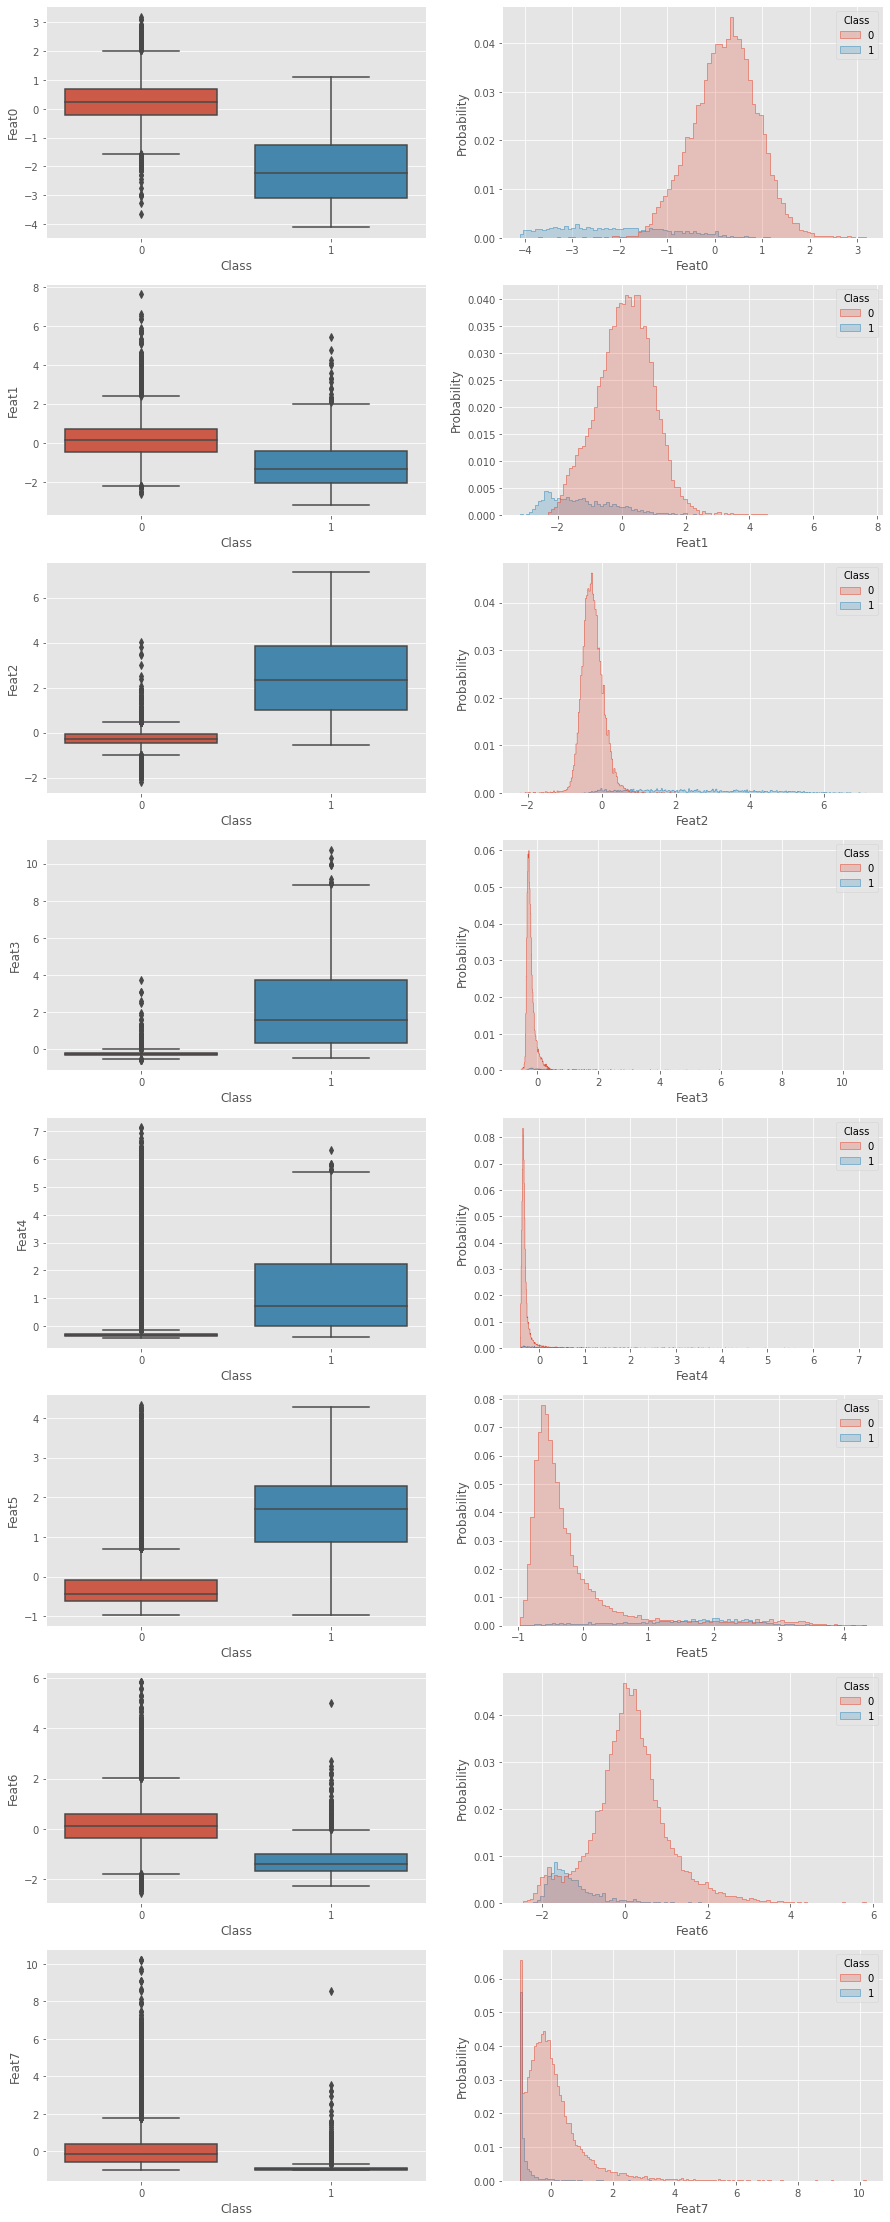

In [9]:
#A little bit more descriptions:

fig, ax = plt.subplots(len(features_names),2, figsize = (15,40));
pvals = [];
for ix in range(len(features_names)):
    y1 = normX2[features_names[ix]][normX2.Class == 0];
    y2 = normX2[features_names[ix]][normX2.Class == 1];
    
    sns.boxplot(x = 'Class', y = features_names[ix], data = normX2, ax = ax[ix,0]);
    stat, p = stats.mannwhitneyu(y1, y2);
    if p < 0.01:
        print(f'For the feature {ix}, significant differences between the pulsar classes were found with a p-value = {p}');
    
    pvals.append(p);
    sns.histplot(x = features_names[ix], data = normX2, ax = ax[ix,1], hue = 'Class',
                 stat = 'probability', element = 'step');
    
plt.show();

<font color = red> At a first glance, the are significant differences between both pulsars. However, the distributions of each class are very overlapped, the densitiy of data is overrepresented for one of the classes, as well as it is possible to see a large amount of outliers. This could suggest that the significance of the differences observed might have to do with the large imbalance of the dataset as illustrated below: </font>

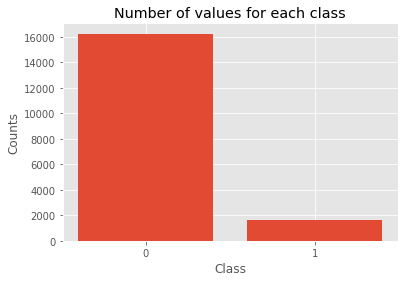

In [10]:
#display a barplot showing counts of data for both pulsar classes:
count = [sum(y_data == 0), sum(y_data == 1)]
plt.bar(x = [0, 1], height=count);
plt.xticks([0,1])
plt.xlabel('Class');
plt.ylabel('Counts');
plt.title('Number of values for each class')
plt.show();

<font color = red> Claramente los datos no están balanceados en número, mostrando una diferencia de casi ocho veces entre ellos. Esto puede hacernos rechazar la hipótesis nula cuando era cierta (error tipo II), lo que podría estar detrás de la gran significancia observada para cada feature. Existen técnicas para balancear la data como el undersampling y oversampling. Ambos tienes pros y cons: undersampling disminuye la cantidad de muestras y hace que el análisis predictivo pueda correr un poco más rápido, sin embargo podríamos eliminar información importante en el proceso. Oversampling incrementa el número de datos del grupo menor haciendo resampling, pero aumenta el tiempo de computación considerablemente. Haremos un oversampling y luego limpiaremos el dataset de outliers usando el método interquartile range (IQR) para cada clase por separado (los outliers pueden ser diferentes para cada clase): </font>

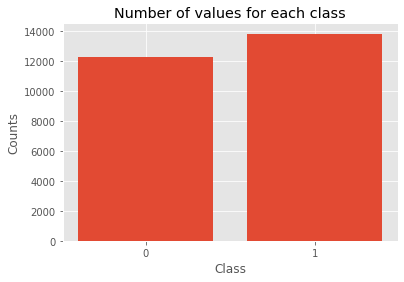

In [11]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

pd.set_option('mode.chained_assignment', None) #to avoid warnings

def detect_outliers(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range, upper_range

ovs= RandomOverSampler(random_state=42);
y = normX2["Class"]
x = normX2.drop("Class", axis=1);

#oversampling method:
x_res , y_res = ovs.fit_resample(x,y)
RandomOverSampler=(x_res , y_res);


#loop over the classes
normX3 = pd.DataFrame(columns = features_names);
classes = y_res.unique();
for k in range(len(classes)):
    M = [];
    sel = y_res == classes[k];
    #loop over the features: 
    for ix in range(len(features_names)):
        col = x_res[features_names[ix]][sel];
        l,u = detect_outliers(col);
        
        upper = col >= u;
        lower = col <= l;
        
        col[upper] = np.nan;
        col[lower] = np.nan;
        M.append(col);
    
    M.append(y_res[sel]);    
    dummy = pd.concat(M, axis=1)
    normX3 = normX3.append(dummy, ignore_index=True);


#remove rows with nans:
normX3 = normX3.dropna().reset_index(drop=True);

count = [sum(normX3.Class == 0), sum(normX3.Class == 1)]
plt.bar(x = [0, 1], height=count);
plt.xticks([0,1])
plt.xlabel('Class');
plt.ylabel('Counts');
plt.title('Number of values for each class')
plt.show();

<font color = red> Ahora que la data está balanceada y con menos outliers, podemos hacer comparaciones un poco más robustas. La matriz de correlación muestra una estructura similar después del balanceo, pero algunas correlaciones ahora están un poco más acentuadas que antes: 

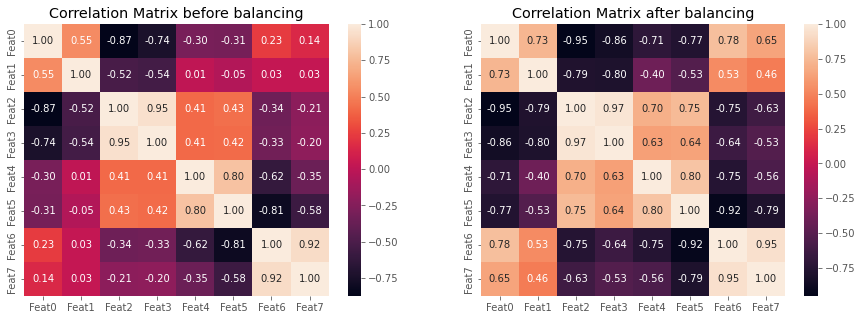

In [12]:
#Correlacion matrix

fig, ax = plt.subplots(1,2, figsize = (15,5));

df = normX2.drop("Class", axis=1)
c_matrix = pd.DataFrame.corr(df.astype('float'))
sns.heatmap(c_matrix, annot=True, fmt='.2f', ax = ax[0]);
ax[0].set_title('Correlation Matrix before balancing')

df = normX3.drop("Class", axis=1)
c_matrix = pd.DataFrame.corr(df.astype('float'))
sns.heatmap(c_matrix, annot=True, fmt='.2f', ax = ax[1]);
ax[1].set_title('Correlation Matrix after balancing')
plt.show()

<font color = red> Procederemos a desplegar nuevamente la estadistica descriptiva para cada feature:

For the feature 0, significant differences between the pulsar classes were found with a p-value = 0.000
For the feature 1, significant differences between the pulsar classes were found with a p-value = 0.000
For the feature 2, significant differences between the pulsar classes were found with a p-value = 0.000
For the feature 3, significant differences between the pulsar classes were found with a p-value = 0.000
For the feature 4, significant differences between the pulsar classes were found with a p-value = 0.000
For the feature 5, significant differences between the pulsar classes were found with a p-value = 0.000
For the feature 6, significant differences between the pulsar classes were found with a p-value = 0.000
For the feature 7, significant differences between the pulsar classes were found with a p-value = 0.000


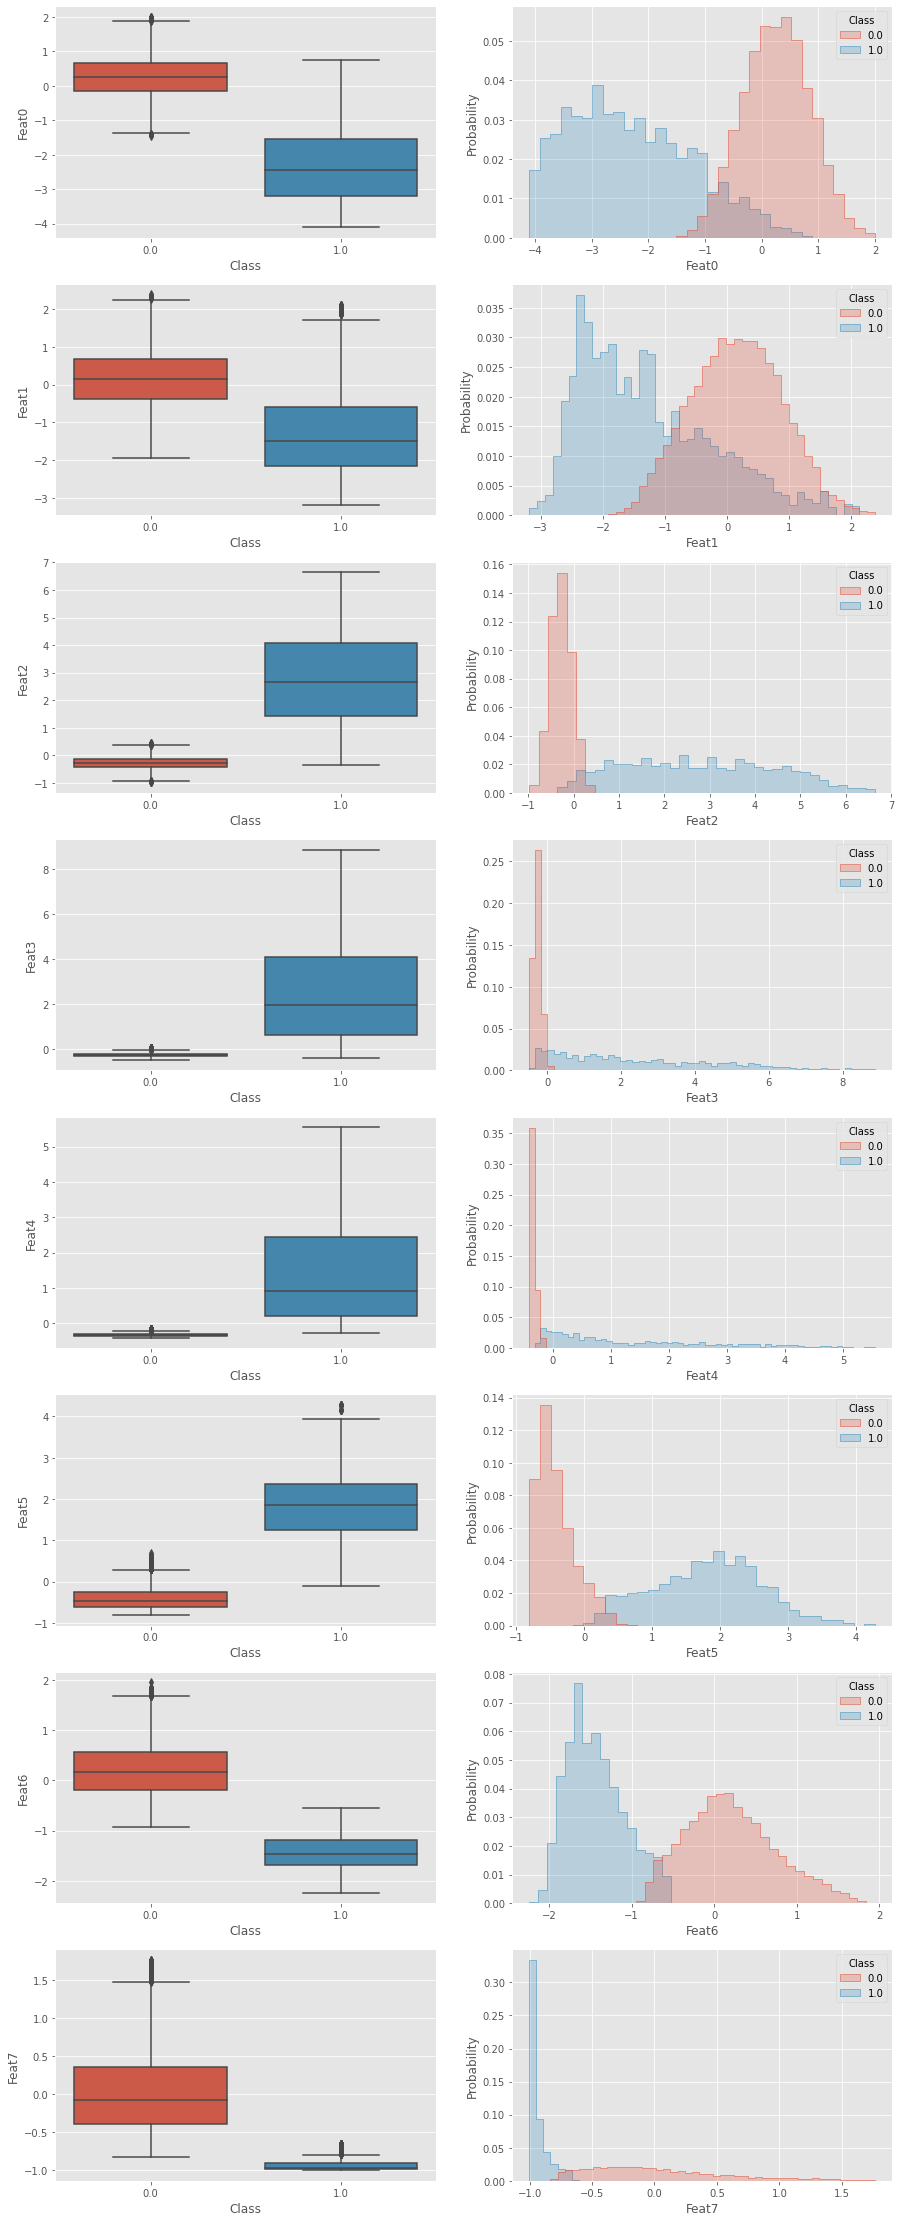

In [13]:
fig, ax = plt.subplots(len(features_names),2, figsize = (15,40));
pvals = [];
for ix in range(len(features_names)):
    y1 = normX2[features_names[ix]][normX3.Class == 0];
    y2 = normX2[features_names[ix]][normX3.Class == 1];
    
    sns.boxplot(x = 'Class', y = features_names[ix], data = normX3, ax = ax[ix,0]);
    stat, p = stats.mannwhitneyu(y1, y2);
    if p < 0.01:
        print(f'For the feature {ix}, significant differences between the pulsar classes were found with a p-value = {p:.3f}');
    
    pvals.append(p);
    sns.histplot(x = features_names[ix], data = normX3, ax = ax[ix,1], hue = 'Class',
                 stat = 'probability', element = 'step');
    
plt.show();

<font color = red> Como es posible apreciar en la figura anterior, las distribuciones de ambas clases de pulsar muestran tendencias más claras dentro de cada feature, así como entre features (figura siguiente): </font>

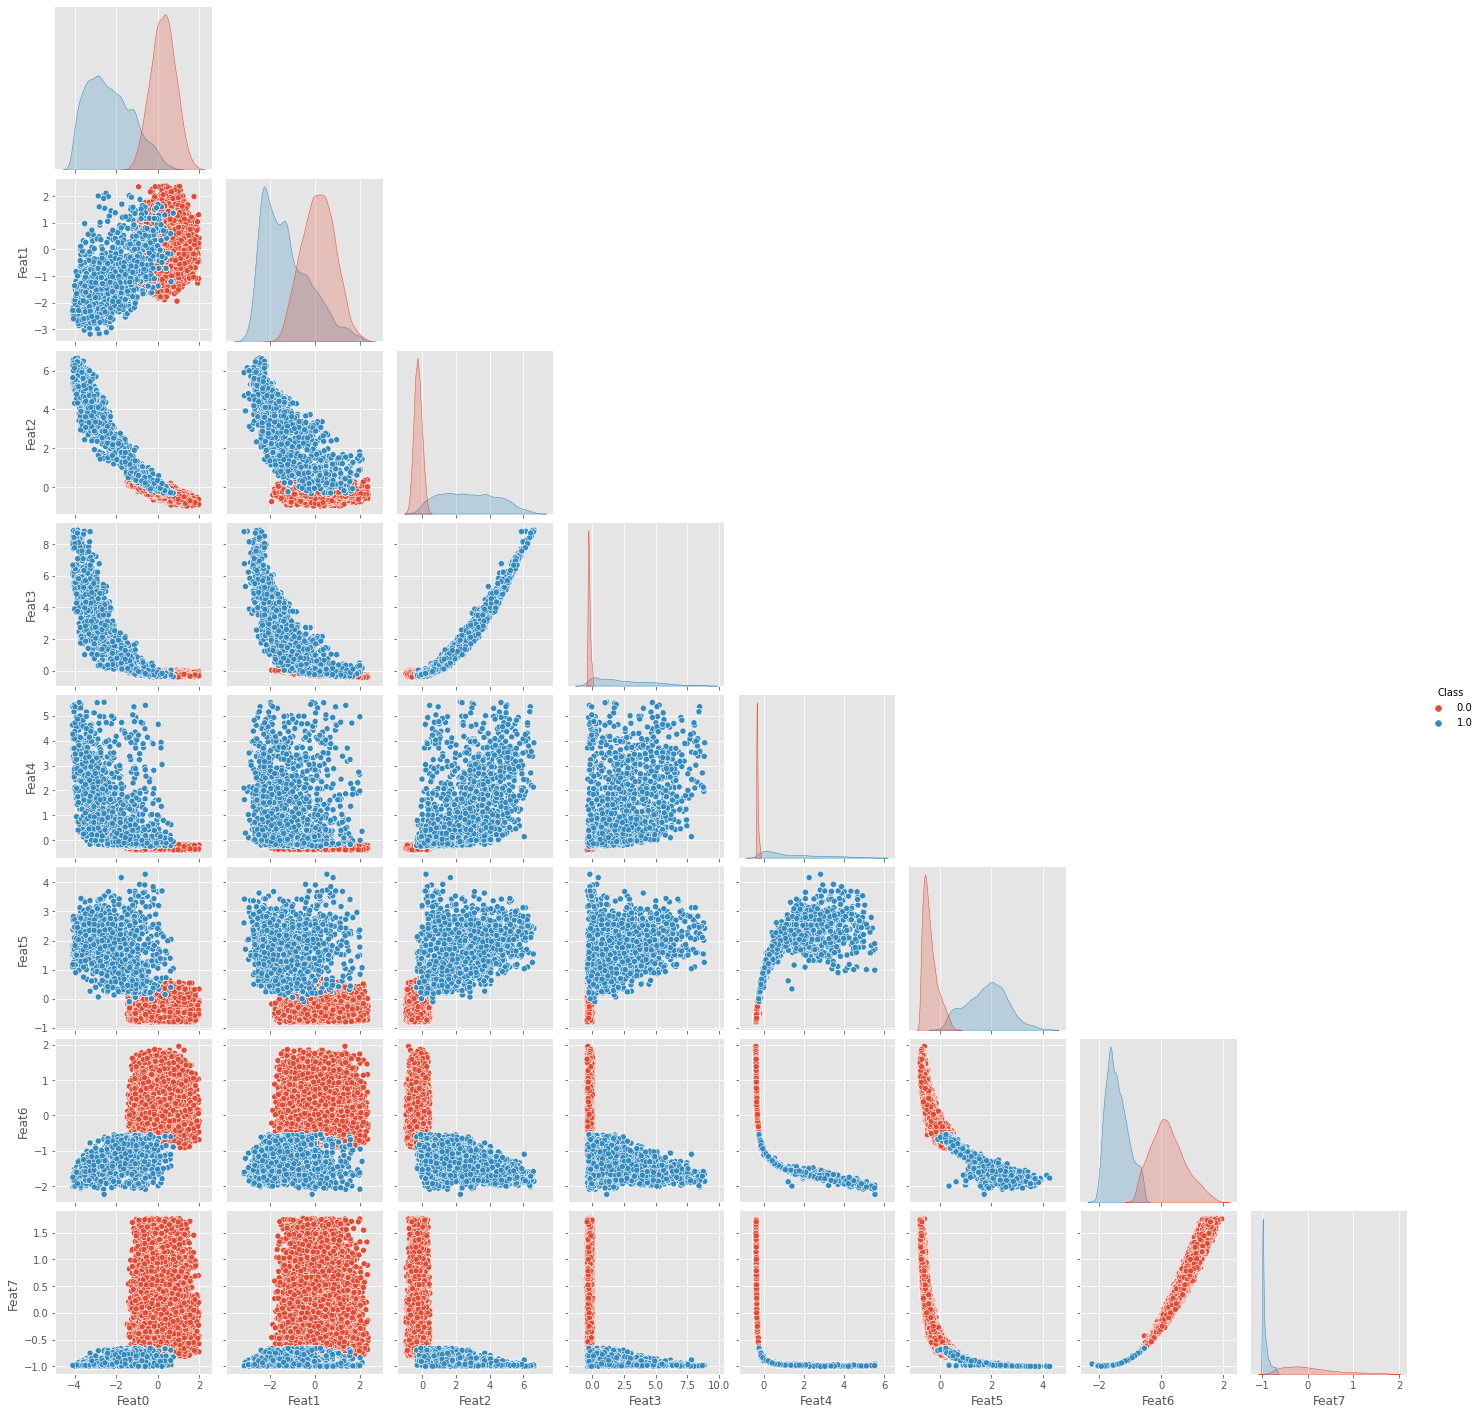

In [14]:
#Describe all the possible interactions between the features:
g = sns.pairplot(normX3, hue = "Class", corner = True, diag_kind='kde', dropna=True);

In [15]:
'''

#Stats summary:

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

y = normX3.Class;
X = normX3.drop("Class", axis=1);

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

if est2.rsquared < 0.8  and est2.f_pvalue <= 0.05:
    print('\n R-cuadrado bajo y P-value bajo (valor de p <= 0,05): \n Significa que su modelo no explica gran parte de la variación de los datos pero es significativa (mejor que no tener un modelo)')
elif est2.rsquared < 0.8  and est2.f_pvalue > 0.05:
    print('\n R-cuadrado bajo y P-value alto (valor p > 0,05): \n Significa que su modelo no explica gran parte de la variación de los datos y no es significativo (peor escenario)');
elif est2.rsquared > 0.8  and est2.f_pvalue <= 0.05:
    print('\n R-cuadrado alto y P-value bajo: \n Significa que su modelo explica mucha variación dentro de los datos y es significativo (mejor escenario)')
elif est2.rsquared > 0.8  and est2.f_pvalue > 0.05:
    print('\n R-cuadrado alto y P-value alto: \n Significa que su modelo explica mucha variación dentro de los datos pero no es significativa (el modelo no tiene valor)')
    
    '''
        

'\n\n#Stats summary:\n\nfrom sklearn import datasets, linear_model\nfrom sklearn.linear_model import LinearRegression\nimport statsmodels.api as sm\n\ny = normX3.Class;\nX = normX3.drop("Class", axis=1);\n\nX2 = sm.add_constant(X)\nest = sm.OLS(y, X2)\nest2 = est.fit()\nprint(est2.summary())\n\nif est2.rsquared < 0.8  and est2.f_pvalue <= 0.05:\n    print(\'\n R-cuadrado bajo y P-value bajo (valor de p <= 0,05): \n Significa que su modelo no explica gran parte de la variación de los datos pero es significativa (mejor que no tener un modelo)\')\nelif est2.rsquared < 0.8  and est2.f_pvalue > 0.05:\n    print(\'\n R-cuadrado bajo y P-value alto (valor p > 0,05): \n Significa que su modelo no explica gran parte de la variación de los datos y no es significativo (peor escenario)\');\nelif est2.rsquared > 0.8  and est2.f_pvalue <= 0.05:\n    print(\'\n R-cuadrado alto y P-value bajo: \n Significa que su modelo explica mucha variación dentro de los datos y es significativo (mejor escenario)\'

## <font color = red> Análisis Predictivo 1: Clustering Jerárquico

<font color =  red> Primero evaluamos el número óptimo de clusters usando el método de silhouette score a partir de la información de todos las features:

-- calculando silhouette score para 2 clusters
-- calculando silhouette score para 3 clusters
-- calculando silhouette score para 4 clusters
-- calculando silhouette score para 5 clusters
-- calculando silhouette score para 6 clusters
-- calculando silhouette score para 7 clusters
-- calculando silhouette score para 8 clusters
-- calculando silhouette score para 9 clusters


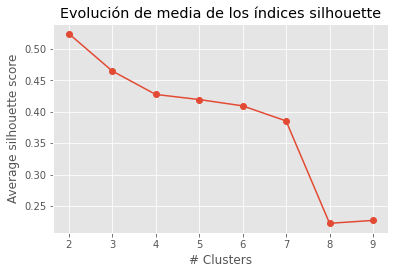

In [15]:
# Método silhouette para identificar el número óptimo de clusters 
range_n_clusters = range(2, 10)
valores_medios_silhouette = []
y = normX3.Class;
X = normX3.drop("Class", axis=1);

for n_clusters in range_n_clusters:
    print(f'-- calculando silhouette score para {n_clusters} clusters')
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters)

    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)


bNClus = np.array(list(range_n_clusters));

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(bNClus, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('# Clusters')
ax.set_ylabel('Average silhouette score');



In [17]:

sel = valores_medios_silhouette == max(valores_medios_silhouette);
n_clus = bNClus[sel][0];
print(f'\n The optimum number of clusters is {n_clus}');


 The optimum number of clusters is 2


<font color  = red> El análisis usado sugiere que el número óptimo de clusters es 2, confirmando la data original. Ahora usaremos 3 tipos de linkage para formar el árbol de distancia euclideana entre los puntos. Luego analizaremos el éxito de cada método para predecir los clusters resultantes.

In [18]:
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            n_clusters         = n_clus,
                            compute_distances = True);
modelo_hclust_complete.fit(X = X);

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            n_clusters         = n_clus,
                            compute_distances = True);
modelo_hclust_average.fit(X = X);

modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = n_clus,
                            compute_distances = True);
modelo_hclust_ward.fit(X = X);

In [20]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts information from an AgglomerativeClustering model and represents its dendrogram with the function
    dendogram from scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    d = dendrogram(linkage_matrix, truncate_mode = 'level', p = 5, **kwargs) #display only 5 levels
    return d

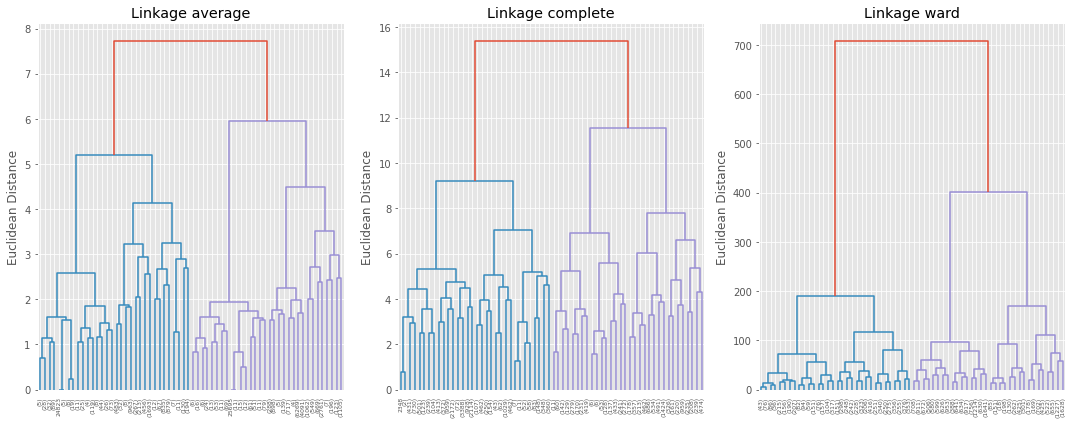

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
plot_dendrogram(modelo_hclust_average, color_threshold = 7, ax = ax[0])
ax[0].set_title("Linkage average")
ax[0].set_ylabel('Euclidean Distance');

plot_dendrogram(modelo_hclust_complete, color_threshold = 12, ax =ax[1])
ax[1].set_title("Linkage complete")
ax[1].set_ylabel('Euclidean Distance');

plot_dendrogram(modelo_hclust_ward, color_threshold = 500, ax = ax[2])
ax[2].set_title("Linkage ward")
ax[2].set_ylabel('Euclidean Distance');
plt.tight_layout();

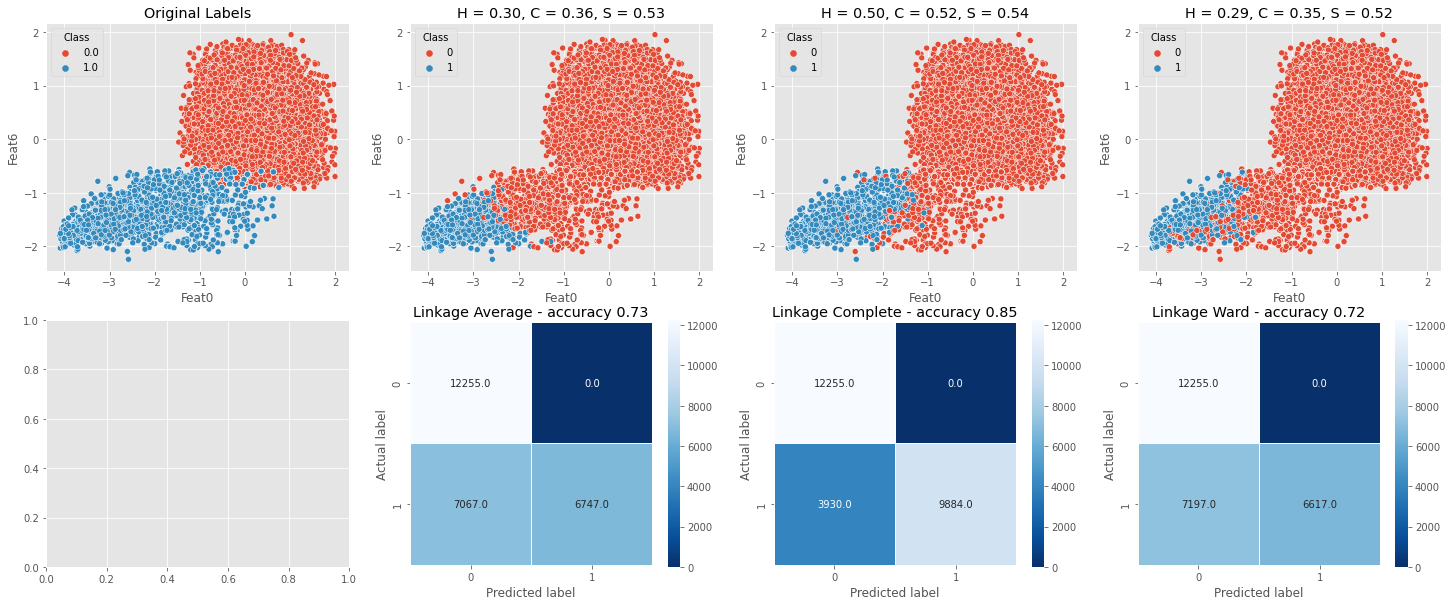

In [22]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10))

sns.scatterplot(x = features_names[0], y = features_names[6], data = normX3, hue = 'Class', ax = ax[0,0]);
ax[0,0].set_title('Original Labels');

y_pred = modelo_hclust_average.labels_;
homogeneity = metrics.homogeneity_score(y, y_pred)
completeness = metrics.completeness_score(y, y_pred)    
s = metrics.silhouette_samples(X, y_pred)
s_mean = metrics.silhouette_score(X, y_pred)
dummy = normX3.copy();
dummy.Class = y_pred;
sns.scatterplot(x = features_names[0], y = features_names[6], data = dummy, hue = 'Class', ax = ax[0,1]);
ax[0,1].set_title(f'H = {homogeneity:.2f}, C = {completeness:.2f}, S = {s_mean:.2f}');


sel0 = modelo_hclust_complete.labels_ == 0;
sel1 = modelo_hclust_complete.labels_ == 1;
modelo_hclust_complete.labels_[sel0] = 1;
modelo_hclust_complete.labels_[sel1] = 0;

y_pred = modelo_hclust_complete.labels_;
homogeneity = metrics.homogeneity_score(y, y_pred)
completeness = metrics.completeness_score(y, y_pred)    
s = metrics.silhouette_samples(X, y_pred)
s_mean = metrics.silhouette_score(X, y_pred)
dummy = normX3.copy();
dummy.Class = y_pred;
sns.scatterplot(x = features_names[0], y = features_names[6], data = dummy, hue = 'Class', ax = ax[0,2]);
ax[0,2].set_title(f'H = {homogeneity:.2f}, C = {completeness:.2f}, S = {s_mean:.2f}');

y_pred = modelo_hclust_ward.labels_;
homogeneity = metrics.homogeneity_score(y, y_pred)
completeness = metrics.completeness_score(y, y_pred)    
s = metrics.silhouette_samples(X, y_pred)
s_mean = metrics.silhouette_score(X, y_pred)
dummy = normX3.copy();
dummy.Class = y_pred;
sns.scatterplot(x = features_names[0], y = features_names[6], data = dummy, hue = 'Class', ax = ax[0,3]);
ax[0,3].set_title(f'H = {homogeneity:.2f}, C = {completeness:.2f}, S = {s_mean:.2f}');


#Confusion matrices:
y_pred = modelo_hclust_average.labels_;
cm = confusion_matrix(normX3.Class, y_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r', ax =  ax[1,1]);
ax[1,1].set_ylabel('Actual label');
ax[1,1].set_xlabel('Predicted label');
accuracy = sum(y_pred == normX3.Class)/len(y_pred);
ax[1,1].set_title(f'Linkage Average - accuracy {accuracy:.2f}');

y_pred = modelo_hclust_complete.labels_;
cm = confusion_matrix(normX3.Class, y_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r', ax =  ax[1,2]);
ax[1,2].set_ylabel('Actual label');
ax[1,2].set_xlabel('Predicted label');
accuracy = sum(y_pred == normX3.Class)/len(y_pred);
ax[1,2].set_title(f'Linkage Complete - accuracy {accuracy:.2f}');

y_pred = modelo_hclust_ward.labels_;
cm = confusion_matrix(normX3.Class, y_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r', ax =  ax[1,3]);
ax[1,3].set_ylabel('Actual label');
ax[1,3].set_xlabel('Predicted label');
accuracy = sum(y_pred == normX3.Class)/len(y_pred);
ax[1,3].set_title(f'Linkage Ward - accuracy {accuracy:.2f}');



<font color = red> El clustering jerárquico usando 3 difentes métodos de linkage muestra 3 diferentes resultados. El dendrograma para el linkage average y ward muestran dos clusters principales que se separan suficiente para distinguirlos, pero con poca homogeneidad. Por otro lado el linkage complete pudo distinguir 2 clusters con la mayor homogeneidad, completeness, y silhouette score, en comparación a los otros métodos. 

## <font color = red> Análisis Predictivo 2: K-MEANS

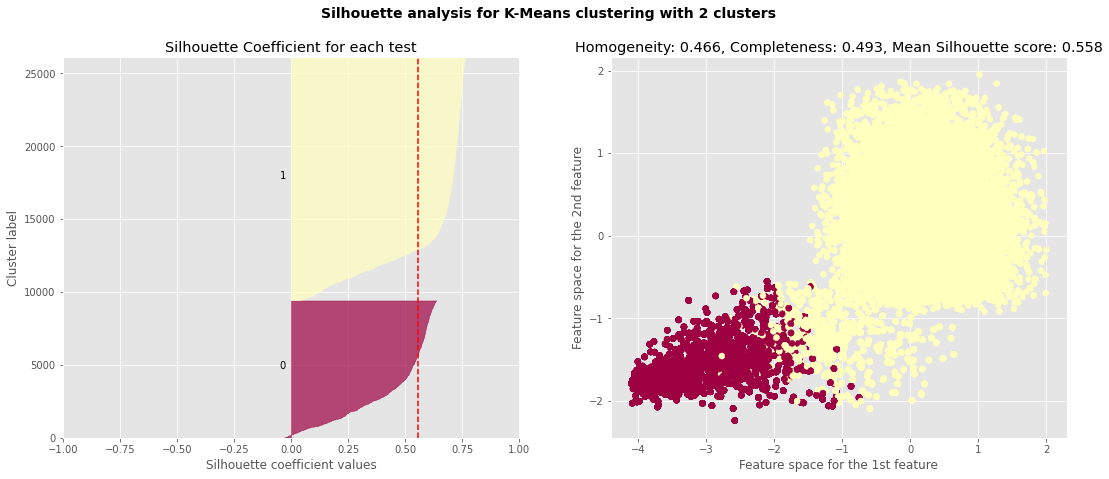

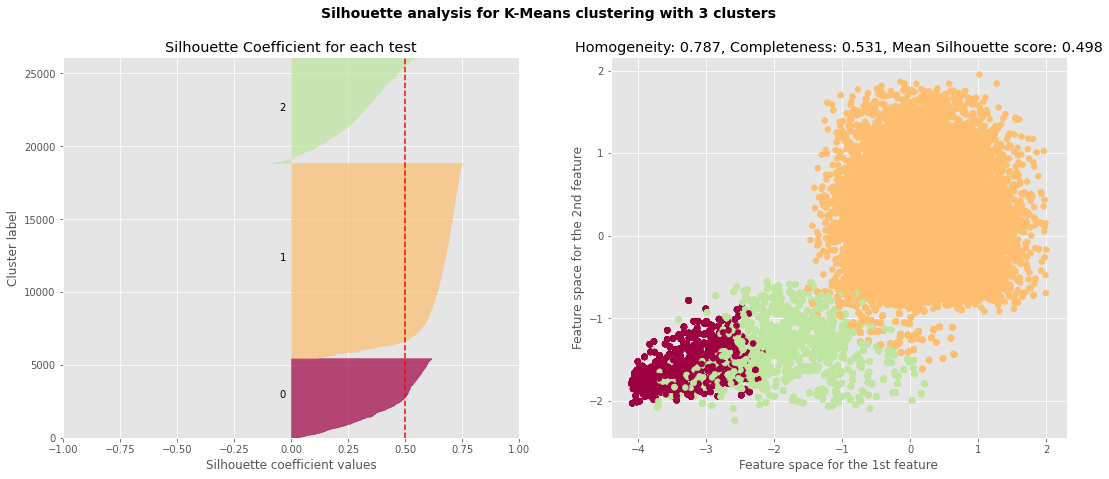

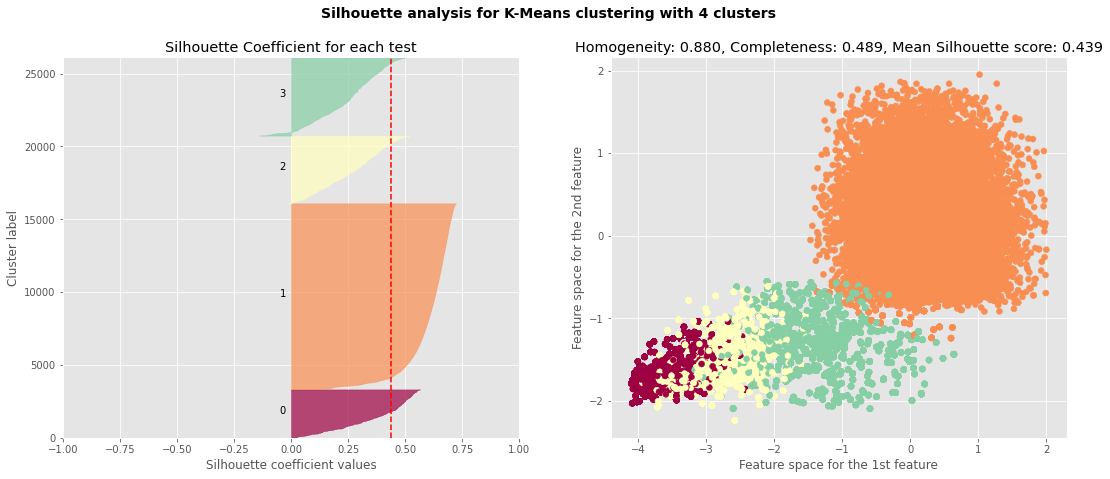

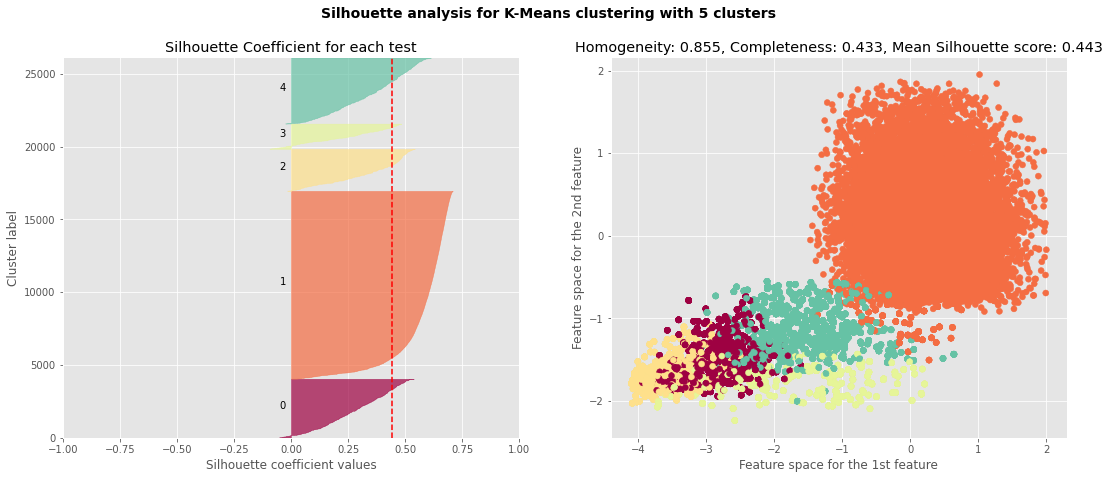

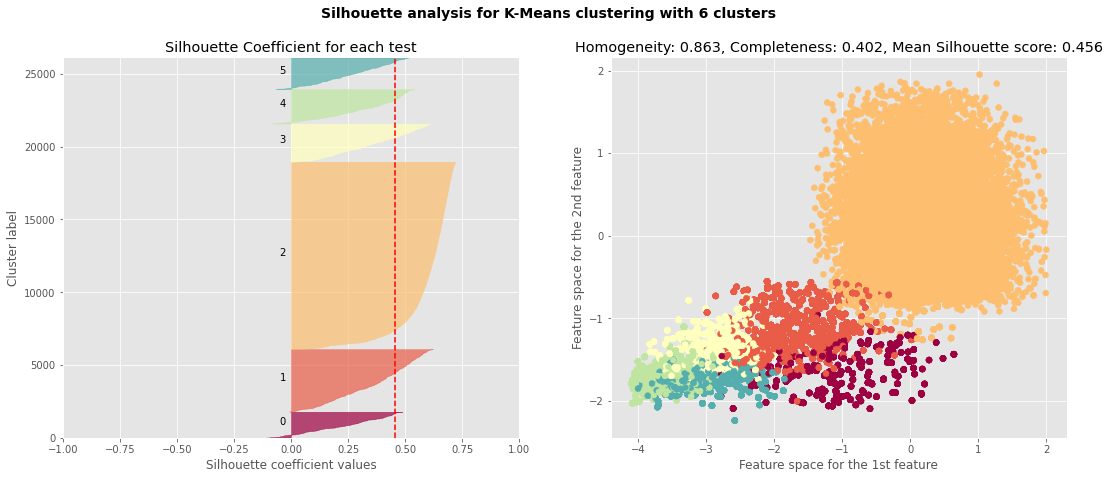

In [25]:
# Lista con el número de clusters a probar.
range_n_clusters = [2, 3, 4, 5, 6]

# para cada cluster, realizar el análisis de Silhouette y visualizar los resultados.
for n_clusters in range_n_clusters:
    
    # Entrenar K-means.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(X)
    
    # Calcular la homogeneity y el completeness.
    homogeneity = metrics.homogeneity_score(y, y_pred)
    completeness = metrics.completeness_score(y, y_pred)
    
    # Calcular el Silhouette Coefficient para cada ejemplo.
    s = metrics.silhouette_samples(X, y_pred)
    
    # Calcular el Silhouette Coefficient promedio para todos los puntos.
    s_mean = metrics.silhouette_score(X, y_pred)
    
    # Gráficos -----------------------------------------------------------------------------------
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Configure plot.
    plt.suptitle(f'Silhouette analysis for K-Means clustering with {n_clusters} clusters',
                 fontsize=14, fontweight='bold')
    
    # Configure 1st subplot.
    ax1.set_title('Silhouette Coefficient for each test')
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Configure 2st subplot.
    ax2.set_title(f'Homogeneity: {homogeneity:.3f}, Completeness: {completeness:.3f}, Mean Silhouette score: {s_mean:.3f}')
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    # For 1st subplot ------------------------------------------------------------------------------------------
    
    # Plot Silhouette Coefficient for each sample
    y_lower = 10
    for i in range(n_clusters):
        ith_s = s[y_pred == i]
        ith_s.sort()
        size_cluster_i = ith_s.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    # Plot the mean Silhouette Coefficient using red vertical dash line.
    ax1.axvline(x=s_mean, color="red", linestyle="--")
    
    # For 2st subplot -------------------------------------------------------------------------------------------
    # Plot the predictions
    colors = cm.Spectral(y_pred.astype(float) / n_clusters)
    ax2.scatter(X[features_names[0]], X[features_names[6]], c = colors)



### 2. Selección de Caracteristicas

**Ocupe al menos 3 técnicas de selección de características (1 de cada familia de técnicas)** para quedarse con el subconjunto que maximice el indice de desempeño F1. Tambien genere un reporte de clasificación. Elija 1 algoritmo de clasificación para realizarlo.



In [29]:
#1. ANOVA-fvalue
y = normX3.Class;
X = normX3.drop("Class", axis=1);

f_value = f_classif(X, y)


In [30]:
#2. Variance Threshold:
selector = VarianceThreshold()
selector.fit_transform(X);


In [31]:
#3. Mutual Information:
MI_score = mutual_info_classif(X, y, random_state=0);


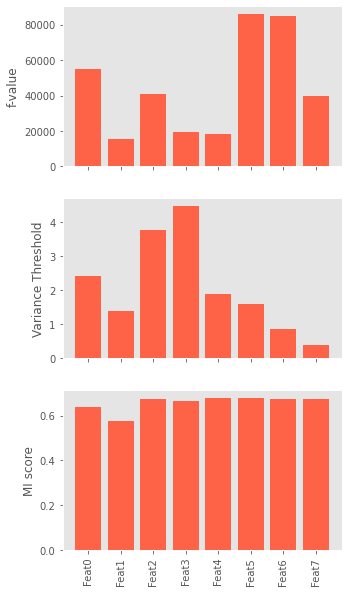

In [32]:
#Plotting:
 
fig, ax = plt.subplots(3, 1, figsize = (5,10), sharex = True);

ax[0].bar(x=features_names, height = f_value[0], color='tomato');
ax[0].set_ylabel('f-value');
ax[0].grid();

ax[1].bar(x=features_names, height = selector.variances_, color='tomato')
ax[1].set_ylabel('Variance Threshold');
ax[1].grid();

ax[2].bar(x=features_names, height = MI_score, color='tomato')
ax[2].set_ylabel('MI score');
ax[2].grid();

plt.xticks(rotation='vertical');
plt.show();

## <font color = red> Selección usando logistic regression:

In [33]:
k = 3;
skb = SelectKBest(k = k, score_func= f_classif);

# Train y transform el dataset en base a SelectKBest
X2 = X;
X_data_new = skb.fit_transform(X, y)

# Imprmimimos
print(f'{X_data_new.shape[1]} de {X2.shape[1]} features fueron seleccionadas:')

for feature_list_index in skb.get_support(indices=True):
    print(f'-  {features_names[feature_list_index]} : {real_names[feature_list_index]}');
    

# Regresión Logística
x_train, x_test, y_train, y_test = train_test_split(X_data_new, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=0)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

#prediction:
predictions = log_reg.predict(x_test);
score = log_reg.score(x_test, y_test)
print(f'\n Usando el método f_classif obtenemos un {score*100:.3f} % de accuracy con sólo {k} features')



3 de 8 features fueron seleccionadas:
-  Feat0 : Mean of the integrated profile
-  Feat5 : Standard deviation of the DM-SNR curve
-  Feat6 : Excess kurtosis of the DM-SNR curve

 Usando el método f_classif obtenemos un 99.335 % de accuracy con sólo 3 features


## <font color = red> Selección usando ExhaustiveFeatureSelector 

In [34]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
# Importamos ExhaustiveFeatureSelector desde Mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# Creamos la instancia del clasificador logistic regression 
lr = LogisticRegression()

# Creamos la instancia EFS 
efs = EFS(estimator=lr,        # Utilice la regresión logística como clasificador/estimador
          min_features=1,      # Número mínimo de características a considerar: 1
          max_features=4,      # Número máximo de características a considerar: 4
          scoring='accuracy',  # Métrica a utilizar para evaluar el clasificador
          cv=2)                # Nuúmero de cross-validations a ejecutar: 5


# Entrenamos EFS 
efs = efs.fit(X, y)

# Imprimimos resultados
print(f'\nMejor accuracy score: {efs.best_score_:4.2f}') # best_score_  muestra el mejor score 
print(f'Mejor subset (índices): {efs.best_idx_}') # best_idx_  muestra los índices de las 
                                                  # caractarísticas que entregan el mejor score
print(f'Mejor subset (nombres): {efs.best_feature_names_}') # best_feature_names_  
                                                            # muestra los nombres de las caractarísticas
                                                            # que entregan el mejor score

X_data_new = efs.transform(X)


Features: 162/162


Mejor accuracy score: 1.00
Mejor subset (índices): (0, 2, 3, 5)
Mejor subset (nombres): ('Feat0', 'Feat2', 'Feat3', 'Feat5')


In [35]:
# Veamos el desempeño de cada subconjunto de caractarísticas
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.7789796701189107, 0.7783489335583857]",0.778664,"(Feat1,)",0.001357,0.000315,0.000315
0,"(0,)","[0.9301112389719984, 0.9234310265459568]",0.926771,"(Feat0,)",0.014371,0.00334,0.00334
8,"(0, 1)","[0.9322593018795551, 0.9268068129507442]",0.929533,"(Feat0, Feat1)",0.01173,0.002726,0.002726
10,"(0, 3)","[0.9396240889911776, 0.9373177842565598]",0.938471,"(Feat0, Feat3)",0.004962,0.001153,0.001153
3,"(3,)","[0.9377061756808592, 0.9400797913150223]",0.938893,"(Feat3,)",0.005106,0.001187,0.001187
...,...,...,...,...,...,...,...
134,"(1, 2, 5, 6)","[0.9957805907172996, 0.99631732392205]",0.996049,"(Feat1, Feat2, Feat5, Feat6)",0.001155,0.000268,0.000268
135,"(1, 2, 5, 7)","[0.9957038741848868, 0.9963940463403407]",0.996049,"(Feat1, Feat2, Feat5, Feat7)",0.001485,0.000345,0.000345
153,"(2, 4, 5, 6)","[0.995934023782125, 0.9962406015037594]",0.996087,"(Feat2, Feat4, Feat5, Feat6)",0.00066,0.000153,0.000153
79,"(2, 5, 6)","[0.995934023782125, 0.9962406015037594]",0.996087,"(Feat2, Feat5, Feat6)",0.00066,0.000153,0.000153


In [36]:
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.7789796701189107, 0.7783489335583857]",0.778664,"(Feat1,)",0.001357,0.000315,0.000315
0,"(0,)","[0.9301112389719984, 0.9234310265459568]",0.926771,"(Feat0,)",0.014371,0.00334,0.00334
8,"(0, 1)","[0.9322593018795551, 0.9268068129507442]",0.929533,"(Feat0, Feat1)",0.01173,0.002726,0.002726
10,"(0, 3)","[0.9396240889911776, 0.9373177842565598]",0.938471,"(Feat0, Feat3)",0.004962,0.001153,0.001153
3,"(3,)","[0.9377061756808592, 0.9400797913150223]",0.938893,"(Feat3,)",0.005106,0.001187,0.001187
...,...,...,...,...,...,...,...
134,"(1, 2, 5, 6)","[0.9957805907172996, 0.99631732392205]",0.996049,"(Feat1, Feat2, Feat5, Feat6)",0.001155,0.000268,0.000268
135,"(1, 2, 5, 7)","[0.9957038741848868, 0.9963940463403407]",0.996049,"(Feat1, Feat2, Feat5, Feat7)",0.001485,0.000345,0.000345
153,"(2, 4, 5, 6)","[0.995934023782125, 0.9962406015037594]",0.996087,"(Feat2, Feat4, Feat5, Feat6)",0.00066,0.000153,0.000153
79,"(2, 5, 6)","[0.995934023782125, 0.9962406015037594]",0.996087,"(Feat2, Feat5, Feat6)",0.00066,0.000153,0.000153


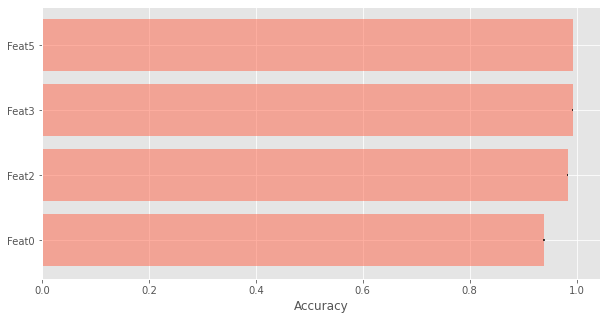

In [37]:
import random

i = random.choices(range(0, len(efs_results)-1), k=X_data_new.shape[1])
i.sort()
fig, ax = plt.subplots(figsize=(10,5))
y_pos = range(len(i)) # len(efs_results)) si quiere visualizarlos todos
ax.barh(y_pos, 
        efs_results.iloc[i]['avg_score'],
        xerr=efs_results.iloc[i]['std_dev'],
        color='tomato',
        alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(efs.best_feature_names_)
#ax.set_yticklabels([]) #efs_results['feature_names']) si quiere ver los nombres
ax.set_xlabel('Accuracy')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Importamos train_test_split fdesderom Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Dividimos dataset en 30% test y 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Instanciamos  random forest classifier
rfc = RandomForestClassifier(random_state=0, 
                             criterion='gini') # Usamos índice gini para definir 
                                               # la importancia de la característica

# Entrenamos el clasificador
rfc.fit(X_train, y_train)

# Imprimimos nombre y Gini index para cada caraterística
for feature in zip(features_names, rfc.feature_importances_): 
    print(f'{feature[0]:17s}: {feature[1]:5.2g}')
    

# Instanciamos SelectFromModel 
sfm = SelectFromModel(estimator=rfc) 

# Entrenamos el selector
sfm = sfm.fit(X_train, y_train)

# Veamos las caractarísticas más importantes
print('\n Características más importantes basadas en clasificador Random Forest:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + features_names[feature_list_index]);
    
    

Feat0            : 0.039
Feat1            : 0.0027
Feat2            :  0.18
Feat3            : 0.044
Feat4            :  0.18
Feat5            :  0.25
Feat6            :  0.15
Feat7            :  0.16

 Características más importantes basadas en clasificador Random Forest:
- Feat2
- Feat4
- Feat5
- Feat6
- Feat7


## <font color = red> Selección usando RandomForest 

In [39]:
from sklearn.metrics import accuracy_score

# Instanciamos random forest classifier
rfc_full = RandomForestClassifier(random_state=0, criterion='gini')

# Entrenamos al clasificador utilizando un conjunto de datos con funciones completas
rfc_full.fit(X_train, y_train)

# Hacemos predicciones
pred_full = rfc_full.predict(X_test)

# Generamos accuracy score
print(f'Accuracy with all features: {accuracy_score(y_test, pred_full):.6f}')

Accuracy with all features: 0.999616


In [40]:
# Transformamos el dataset
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Creamos random forest classifier
rfc_lim = RandomForestClassifier(random_state=0, criterion='gini')

# Entrenamos al clasificador utilizando un subconjunto de características
rfc_lim.fit(X_important_train, y_train)

# Hacemos predicciones
pred_lim = rfc_lim.predict(X_important_test)

# Generamos accuracy score
print(f'Accuracy with the best features: {accuracy_score(y_test, pred_lim):.6f}')

Accuracy with the best features: 0.999489


### 3. Reducción de Dimensionalidad

Con el mismo algoritmo de clasificación anterior, **ocupe PCA para reducir las dimensiones del problema**, reporte el indice F1 y el reporte de clasificación. Comente las diferencias sobre los resultados obtenidos.

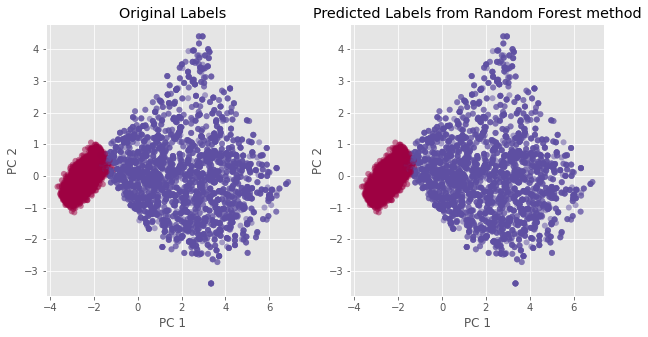

In [41]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(1, 2, figsize=(10,5))
pca = PCA(2)  # Proyectamos de 64 a 2 dimensiones
projected = pca.fit_transform(X_important_test)

ax[0].scatter(projected[:, 0], projected[:, 1],
            c=y_test, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[0].set_title('Original Labels');


ax[1].scatter(projected[:, 0], projected[:, 1],
            c=pred_lim, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
ax[1].set_title('Predicted Labels from Random Forest method');



